In [1]:
import glob
import os
import time
from scipy.io import loadmat
import cobra
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway
import seaborn as sns

In [2]:
IGT_1 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Dadas counts/IGTModel_GSM5009231_DP005.mat")
IGT_2 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Dadas counts/IGTModel_GSM5009237_DP013.mat")
IGT_3 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Dadas counts/IGTModel_GSM5009241_DP025.mat")
IGT_4 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Dadas counts/IGTModel_GSM5009249_DP048.mat")
IGT_5 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Dadas counts/IGTModel_GSM5009251_DP051.mat")

ND_1 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Dadas counts/NDModel_GSM5009234_DP010.mat")
ND_2 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Dadas counts/NDModel_GSM5009236_DP012.mat")
ND_3 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Dadas counts/NDModel_GSM5009239_DP019.mat")
ND_4 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Dadas counts/NDModel_GSM5009252_DP052.mat")
ND_5 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Dadas counts/NDModel_GSM5009254_DP054.mat")

T2D_1 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Dadas counts/T2DModel_GSM5009230_DP003.mat")
T2D_2 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Dadas counts/T2DModel_GSM5009243_DP030.mat")
T2D_3 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Dadas counts/T2DModel_GSM5009247_DP042.mat")
T2D_4 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Dadas counts/T2DModel_GSM5009250_DP049.mat")
T2D_5 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Dadas counts/T2DModel_GSM5009255_DP055.mat")

T3cD_1 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Dadas counts/T3cDModel_GSM5009229_DP002.mat")
T3cD_2 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Dadas counts/T3cDModel_GSM5009238_DP017.mat")
T3cD_3 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Dadas counts/T3cDModel_GSM5009242_DP028.mat")
T3cD_4 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Dadas counts/T3cDModel_GSM5009245_DP039.mat")
T3cD_5 = cobra.io.load_matlab_model("C:/Users/NOE/Desktop/Dadas counts/T3cDModel_GSM5009263_DP066.mat")


No defined compartments in model ContextModel_IGT. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, l, m, n, r, x
No defined compartments in model ContextModel_IGT. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, l, m, n, r, x
No defined compartments in model ContextModel_IGT. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, l, m, n, r, x
No defined compartments in model ContextModel_IGT. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, l, m, n, r, x
No defined compartments in model ContextModel_IGT. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, l, m

# FBA:

## 1. Trobar valors de Biomassa:

In [3]:
solution_IGT_1=IGT_1.optimize()
solution_IGT_1

solution_IGT_2=IGT_2.optimize()
solution_IGT_2

solution_IGT_3=IGT_3.optimize()
solution_IGT_3

solution_IGT_4=IGT_4.optimize()
solution_IGT_4

solution_IGT_5=IGT_5.optimize()
solution_IGT_5

solution_ND_1=ND_1.optimize()
solution_ND_1

solution_ND_2=ND_2.optimize()
solution_ND_2

solution_ND_3=ND_3.optimize()
solution_ND_3

solution_ND_4=ND_4.optimize()
solution_ND_4

solution_ND_5=ND_5.optimize()
solution_ND_5

solution_T2D_1=T2D_1.optimize()
solution_T2D_1

solution_T2D_2=T2D_2.optimize()
solution_T2D_2

solution_T2D_3=T2D_3.optimize()
solution_T2D_3

solution_T2D_4=T2D_4.optimize()
solution_T2D_4

solution_T2D_5=T2D_5.optimize()
solution_T2D_5

solution_T3cD_1=T3cD_1.optimize()
solution_T3cD_1

solution_T3cD_2=T3cD_2.optimize()
solution_T3cD_2

solution_T3cD_3=T3cD_3.optimize()
solution_T3cD_3

solution_T3cD_4=T3cD_4.optimize()
solution_T3cD_4

solution_T3cD_5=T3cD_5.optimize()
solution_T3cD_5

#TABULAR LES BIOMASSES AMB LA FUNCIÓ "x.objective_value":
data_biomass = {
    'Modelo': ['IGT_1','IGT_2', 'IGT_3','IGT_4','IGT_5',
              'ND_1','ND_2','ND_3','ND_4','ND_5',
               'T2D_1','T2D_2','T2D_3','T2D_4','T2D_5',
               'T3cD_1','T3cD_2','T3cD_3','T3cD_4','T3cD_5'],
    'Biomasses': [solution_IGT_1.objective_value,solution_IGT_2.objective_value,solution_IGT_3.objective_value,solution_IGT_4.objective_value,solution_IGT_5.objective_value,
                 solution_ND_1.objective_value,solution_ND_2.objective_value,solution_ND_3.objective_value,solution_ND_4.objective_value,solution_ND_5.objective_value,
                 solution_T2D_1.objective_value,solution_T2D_2.objective_value,solution_T2D_3.objective_value,solution_T2D_4.objective_value,solution_T2D_5.objective_value,
                 solution_T3cD_1.objective_value,solution_T3cD_2.objective_value,solution_T3cD_3.objective_value,solution_T3cD_4.objective_value,solution_T3cD_5.objective_value]
}

df_biomass=pd.DataFrame(data_biomass)
df_biomass

,Modelo,Biomasses
0,IGT_1,159.796464
1,IGT_2,166.487381
2,IGT_3,208.022978
3,IGT_4,123.227462
4,IGT_5,185.457739
5,ND_1,108.165295
6,ND_2,125.957369
7,ND_3,135.382260
8,ND_4,137.670759
9,ND_5,140.450645


### 1.1. Veure graficament les biomasses:

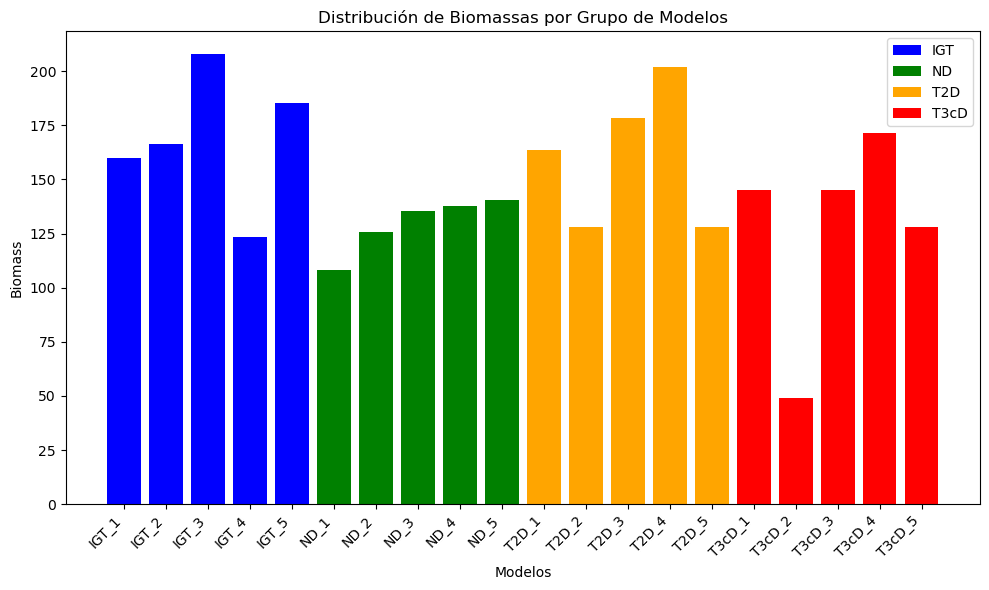

In [77]:
# Separar los modelos en los cuatro grupos
IGT_models = df_biomass[df_biomass['Modelo'].str.startswith('IGT')]
ND_models = df_biomass[df_biomass['Modelo'].str.startswith('ND')]
T2D_models = df_biomass[df_biomass['Modelo'].str.startswith('T2D')]
T3cD_models = df_biomass[df_biomass['Modelo'].str.startswith('T3cD')]

# Obtener los valores de biomasa para cada grupo
IGT_biomasses = IGT_models['Biomasses']
ND_biomasses = ND_models['Biomasses']
T2D_biomasses = T2D_models['Biomasses']
T3cD_biomasses = T3cD_models['Biomasses']

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(IGT_models['Modelo'], IGT_biomasses, color='blue', label='IGT')
plt.bar(ND_models['Modelo'], ND_biomasses, color='green', label='ND')
plt.bar(T2D_models['Modelo'], T2D_biomasses, color='orange', label='T2D')
plt.bar(T3cD_models['Modelo'], T3cD_biomasses, color='red', label='T3cD')

# Añadir etiquetas y título
plt.xlabel('Modelos')
plt.ylabel('Biomass')
plt.title('Distribución de Biomassas por Grupo de Modelos')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Mostrar el histograma
plt.tight_layout()
plt.show()

### 1.2.BoxPlot: Biomasses

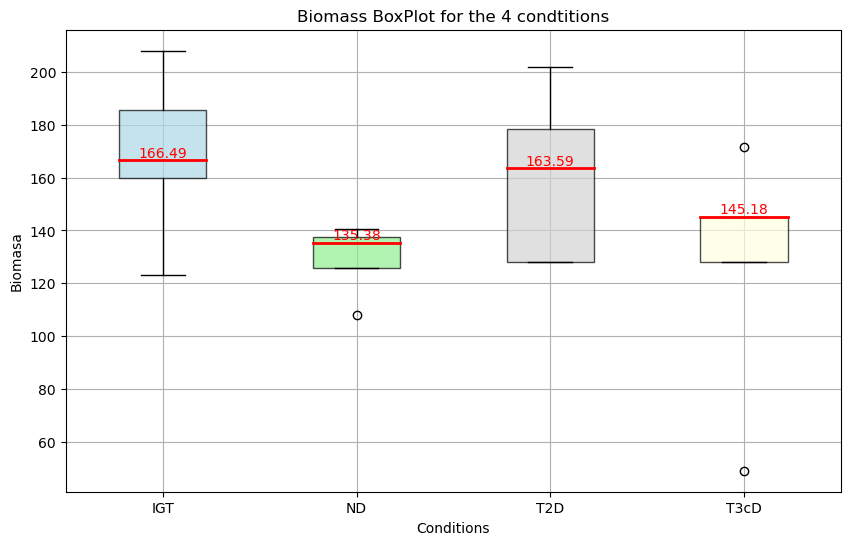

In [82]:
biomass_IGT = [solution_IGT_1.objective_value, solution_IGT_2.objective_value, solution_IGT_3.objective_value, solution_IGT_4.objective_value, solution_IGT_5.objective_value]
biomass_ND = [solution_ND_1.objective_value, solution_ND_2.objective_value, solution_ND_3.objective_value, solution_ND_4.objective_value, solution_ND_5.objective_value]
biomass_T2D = [solution_T2D_1.objective_value, solution_T2D_2.objective_value, solution_T2D_3.objective_value, solution_T2D_4.objective_value, solution_T2D_5.objective_value]
biomass_T3cD = [solution_T3cD_1.objective_value, solution_T3cD_2.objective_value, solution_T3cD_3.objective_value, solution_T3cD_4.objective_value, solution_T3cD_5.objective_value]

# Crear el boxplot
plt.figure(figsize=(10, 6))
bp = plt.boxplot([biomass_IGT, biomass_ND, biomass_T2D, biomass_T3cD], labels=['IGT', 'ND', 'T2D', 'T3cD'], patch_artist= True)
colors = ['lightblue', 'lightgreen', 'lightgrey', 'lightyellow']

# Dar color a las cajas:
for box, color in zip(bp['boxes'], colors):
    box.set_facecolor(color)
    box.set_alpha(0.7)

#Dar color a las rallas de mediana:
for median in bp['medians']:
    median.set(color='red', linewidth=2)

    #Poner el valor de las medianas:
for i, median in enumerate(bp['medians']):
    plt.text(i + 1, median.get_ydata()[0], f'{median.get_ydata()[0]:.2f}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='red')

    
plt.title('Biomass BoxPlot for the 4 condtitions')
plt.xlabel('Conditions')
plt.ylabel('Biomasa')
plt.grid(True)
plt.show()

### 1.3.ANOVA: Diferencies significatives entre les biomasses

#### 1. Visualitzar si hi ha algun grup significativament diferent de biomassa: (forma general)

In [69]:
f_statistic, p_value = f_oneway(biomass_IGT, biomass_ND, biomass_T2D, biomass_T3cD)

# Imprimir los resultados
print("Estadístico F:", f_statistic)
print("Valor p:", p_value)

# Interpretar los resultados
if p_value < 0.05:
    print("Hay diferencias significativas entre al menos dos grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")

Estadístico F: 1.984043163096608
Valor p: 0.15702322928220397
No hay diferencias significativas entre los grupos.


In [76]:
#REALITZAR TUEKEY PARA VEURE MILLOR LES DIFERENCIES ENTRE ELS GRUPS:

all_biomass = biomass_IGT + biomass_ND + biomass_T2D + biomass_T3cD
group_labels = ['IGT'] * len(biomass_IGT) + ['ND'] * len(biomass_ND) + ['T2D'] * len(biomass_T2D) + ['T3cD'] * len(biomass_T3cD)

# Realizar el análisis de Tukey
tukey_results = pairwise_tukeyhsd(all_biomass, group_labels)

# Mostrar los resultados
print(tukey_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper  reject
------------------------------------------------------
   IGT     ND -39.0731 0.2809  -98.9919 20.8456  False
   IGT    T2D  -8.6011 0.9758  -68.5199 51.3176  False
   IGT   T3cD  -40.718 0.2495 -100.6368 19.2007  False
    ND    T2D   30.472 0.4856  -29.4468 90.3908  False
    ND   T3cD  -1.6449 0.9998  -61.5637 58.2739  False
   T2D   T3cD -32.1169 0.4418  -92.0357 27.8019  False
------------------------------------------------------


#### 2. Fer ANOVA individuals entre els grups per veure les diferencies significatives entre ells. Aplicar Bonferroni per evitar Error tipus I.

In [71]:
from scipy.stats import f_oneway

# Realizar la prueba de ANOVA para cada par de grupos
f_statistic_IGT_ND, p_value_IGT_ND = f_oneway(biomass_IGT, biomass_ND)
f_statistic_IGT_T2D, p_value_IGT_T2D = f_oneway(biomass_IGT, biomass_T2D)
f_statistic_IGT_T3cD, p_value_IGT_T3cD = f_oneway(biomass_IGT, biomass_T3cD)

f_statistic_ND_T2D, p_value_ND_T2D = f_oneway(biomass_ND, biomass_T2D)
f_statistic_ND_T3cD, p_value_ND_T3cD = f_oneway(biomass_ND, biomass_T3cD)

f_statistic_T2D_T3cD, p_value_T2D_T3cD = f_oneway(biomass_T2D, biomass_T3cD)

# Aplicar corrección de Bonferroni
alpha = 0.05
p_value_IGT_ND_corrected = p_value_IGT_ND * 4  # Número total de comparaciones
p_value_IGT_T2D_corrected = p_value_IGT_T2D * 4
p_value_IGT_T3cD_corrected = p_value_IGT_T3cD * 4
p_value_ND_T2D_corrected = p_value_ND_T2D * 4
p_value_ND_T3cD_corrected = p_value_ND_T3cD * 4
p_value_T2D_T3cD_corrected = p_value_T2D_T3cD * 4

# Imprimir los resultados ajustados
print("IGT vs ND - p-valor corregido:", p_value_IGT_ND_corrected)
print("IGT vs T2D - p-valor corregido:", p_value_IGT_T2D_corrected)
print("IGT vs T3cD - p-valor corregido:", p_value_IGT_T3cD_corrected)
print("ND vs T2D - p-valor corregido:", p_value_ND_T2D_corrected)
print("ND vs T3cD - p-valor corregido:", p_value_ND_T3cD_corrected)
print("T2D vs T3cD - p-valor corregido:", p_value_T2D_T3cD_corrected)


IGT vs ND - p-valor corregido: 0.13509631171824404
IGT vs T2D - p-valor corregido: 2.72327574244193
IGT vs T3cD - p-valor corregido: 0.5797056791170723
ND vs T2D - p-valor corregido: 0.34269789149042745
ND vs T3cD - p-valor corregido: 3.7657767418468326
T2D vs T3cD - p-valor corregido: 0.9648756655958272


In [9]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
data = grupo_1 + grupo_2 + grupo_3 + grupo_4
labels = ['Grupo 1'] * 5 + ['Grupo 2'] * 5 + ['Grupo 3'] * 5 + ['Grupo 4'] * 5

# Realiza la prueba ANOVA global
f_statistic, p_value = f_oneway(grupo_1, grupo_2, grupo_3, grupo_4)
print("Valor F:", f_statistic)
print("Valor p:", p_value)

# Realiza la prueba de Tukey
tukey_results = pairwise_tukeyhsd(data, labels)
print(tukey_results)

Valor F: 1.984043163096608
Valor p: 0.15702322928220397
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2 meandiff p-adj    lower    upper  reject
--------------------------------------------------------
Grupo 1 Grupo 2 -39.0731 0.2809  -98.9919 20.8456  False
Grupo 1 Grupo 3  -8.6011 0.9758  -68.5199 51.3176  False
Grupo 1 Grupo 4  -40.718 0.2495 -100.6368 19.2007  False
Grupo 2 Grupo 3   30.472 0.4856  -29.4468 90.3908  False
Grupo 2 Grupo 4  -1.6449 0.9998  -61.5637 58.2739  False
Grupo 3 Grupo 4 -32.1169 0.4418  -92.0357 27.8019  False
--------------------------------------------------------


## 2.Trobar els Fluxes de cada model

In [11]:
flujosIGT_1= solution_IGT_1.fluxes
flujosIGT_2= solution_IGT_2.fluxes
flujosIGT_3= solution_IGT_3.fluxes
flujosIGT_4= solution_IGT_4.fluxes
flujosIGT_5= solution_IGT_5.fluxes

flujosND_1= solution_ND_1.fluxes
flujosND_2= solution_ND_2.fluxes
flujosND_3= solution_ND_3.fluxes
flujosND_4= solution_ND_4.fluxes
flujosND_5= solution_ND_5.fluxes

flujosT2D_1= solution_T2D_1.fluxes
flujosT2D_2= solution_T2D_2.fluxes
flujosT2D_3= solution_T2D_3.fluxes
flujosT2D_4= solution_T2D_4.fluxes
flujosT2D_5= solution_T2D_5.fluxes

flujosT3cD_1= solution_T3cD_1.fluxes
flujosT3cD_2= solution_T3cD_2.fluxes
flujosT3cD_3= solution_T3cD_3.fluxes
flujosT3cD_4= solution_T3cD_4.fluxes
flujosT3cD_5= solution_T3cD_5.fluxes

print(flujosIGT_5)
print(flujosND_5)
print(flujosT2D_5)
print(flujosT3cD_5)



10FTHFtm           0.000000
13DAMPPOX          0.000000
2AMADPTm           0.000000
2HBO               0.000000
2HBt2              0.000000
                    ...    
sink_tyr_L[c]    -29.612037
sink_4abut[l]      0.000000
DM_5cysdopa[c]     0.000000
DM_4abut[c]        0.000000
DM_btn[n]          0.000000
Name: fluxes, Length: 3577, dtype: float64
13DAMPPOX         0.0
2HBO              0.0
2HBt2             0.0
2HCO3_NAt         0.0
2OXOADOXm         0.0
                 ... 
sink_tyr_L[c]     0.0
sink_4abut[l]     0.0
DM_5cysdopa[c]    0.0
DM_4abut[c]       0.0
DM_btn[n]         0.0
Name: fluxes, Length: 3611, dtype: float64
13DAMPPOX                0.000000
2HBO                     0.000000
2HBt2                    0.000000
2OXOADOXm                0.000000
2OXOADPTm                0.000000
                          ...    
sink_ser_L[c]          -90.803362
sink_tyr_L[c]          -20.457204
sink_4abut[l]            0.000000
DM_4glu56dihdind[c]      0.000000
DM_4abut[c]            9

### 2.1. Construcció DataFrames dels Fluxes

In [18]:
df_IGT1=pd.DataFrame({'Reacciones':flujosIGT_1.index,'Flujos_IGT_1':flujosIGT_1.values})
df_IGT2=pd.DataFrame({'Reacciones':flujosIGT_2.index,'Flujos_IGT_2':flujosIGT_2.values})
df_IGT3=pd.DataFrame({'Reacciones':flujosIGT_3.index,'Flujos_IGT_3':flujosIGT_3.values})
df_IGT4=pd.DataFrame({'Reacciones':flujosIGT_4.index,'Flujos_IGT_4':flujosIGT_4.values})
df_IGT5=pd.DataFrame({'Reacciones':flujosIGT_5.index,'Flujos_IGT_5':flujosIGT_5.values})

df_ND1=pd.DataFrame({'Reacciones':flujosND_1.index,'Flujos_ND_1':flujosND_1.values})
df_ND2=pd.DataFrame({'Reacciones':flujosND_2.index,'Flujos_ND_2':flujosND_2.values})
df_ND3=pd.DataFrame({'Reacciones':flujosND_3.index,'Flujos_ND_3':flujosND_3.values})
df_ND4=pd.DataFrame({'Reacciones':flujosND_4.index,'Flujos_ND_4':flujosND_4.values})
df_ND5=pd.DataFrame({'Reacciones':flujosND_5.index,'Flujos_ND_5':flujosND_5.values})

df_T2D1=pd.DataFrame({'Reacciones':flujosT2D_1.index,'Flujos_T2D_1':flujosT2D_1.values})
df_T2D2=pd.DataFrame({'Reacciones':flujosT2D_2.index,'Flujos_T2D_2':flujosT2D_2.values})
df_T2D3=pd.DataFrame({'Reacciones':flujosT2D_3.index,'Flujos_T2D_3':flujosT2D_3.values})
df_T2D4=pd.DataFrame({'Reacciones':flujosT2D_4.index,'Flujos_T2D_4':flujosT2D_4.values})
df_T2D5=pd.DataFrame({'Reacciones':flujosT2D_5.index,'Flujos_T2D_5':flujosT2D_5.values})

df_T3cD1=pd.DataFrame({'Reacciones':flujosT3cD_1.index,'Flujos_T3cD_1':flujosT3cD_1.values})
df_T3cD2=pd.DataFrame({'Reacciones':flujosT3cD_2.index,'Flujos_T3cD_2':flujosT3cD_2.values})
df_T3cD3=pd.DataFrame({'Reacciones':flujosT3cD_3.index,'Flujos_T3cD_3':flujosT3cD_3.values})
df_T3cD4=pd.DataFrame({'Reacciones':flujosT3cD_4.index,'Flujos_T3cD_4':flujosT3cD_4.values})
df_T3cD5=pd.DataFrame({'Reacciones':flujosT3cD_5.index,'Flujos_T3cD_5':flujosT3cD_5.values})
df_T3cD5

,Reacciones,Flujos_T3cD_5
0,13DAMPPOX,0.000000
1,1PPDCRp,0.000000
2,2HBO,0.000000
3,2HCO3_NAt,0.000000
4,2OXOADOXm,0.000000
...,...,...
3485,DM_4glu56dihdind[c],0.000000
3486,DM_5cysdopa[c],0.000000
3487,DM_4abut[c],0.000000
3488,DM_kynate[c],655.299988


### 2.2. Extracció reacció úniques de cada model

In [19]:
# Define sets of reactions from different dataframes
reactions_IGT1 = set(df_IGT1['Reacciones'])
reactions_IGT2 = set(df_IGT2['Reacciones'])
reactions_IGT3 = set(df_IGT3['Reacciones'])
reactions_IGT4 = set(df_IGT4['Reacciones'])
reactions_IGT5 = set(df_IGT5['Reacciones'])
reactions_ND1 = set(df_ND1['Reacciones'])
reactions_ND2 = set(df_ND2['Reacciones'])
reactions_ND3 = set(df_ND3['Reacciones'])
reactions_ND4 = set(df_ND4['Reacciones'])
reactions_ND5 = set(df_ND5['Reacciones'])
reactions_T2D1 = set(df_T2D1['Reacciones'])
reactions_T2D2 = set(df_T2D2['Reacciones'])
reactions_T2D3 = set(df_T2D3['Reacciones'])
reactions_T2D4 = set(df_T2D4['Reacciones'])
reactions_T2D5 = set(df_T2D5['Reacciones'])
reactions_T3cD1 = set(df_T3cD1['Reacciones'])
reactions_T3cD2 = set(df_T3cD2['Reacciones'])
reactions_T3cD3 = set(df_T3cD3['Reacciones'])
reactions_T3cD4 = set(df_T3cD4['Reacciones'])
reactions_T3cD5 = set(df_T3cD5['Reacciones'])

# Para IGM1
reactions_to_add_IGT1 = (
    reactions_IGT2 | reactions_IGT3 | reactions_IGT4 | reactions_IGT5 |
    reactions_ND1 | reactions_ND2 | reactions_ND3 | reactions_ND4 | reactions_ND5 |
    reactions_T2D1 | reactions_T2D2 | reactions_T2D3 | reactions_T2D4 | reactions_T2D5 |
    reactions_T3cD1 | reactions_T3cD2 | reactions_T3cD3 | reactions_T3cD4 | reactions_T3cD5
) - reactions_IGT1

add_IGT1 = pd.DataFrame({'Reacciones': list(reactions_to_add_IGT1), 'Flujos_IGT_1': [0] * len(reactions_to_add_IGT1)})
IGT1 = pd.concat([df_IGT1, add_IGT1])
IGT1 = IGT1.set_index('Reacciones', drop=True)

# Repite el proceso para IGM2
reactions_to_add_IGT2 = (
    reactions_IGT1 | reactions_IGT3 | reactions_IGT4 | reactions_IGT5 |
    reactions_ND1 | reactions_ND2 | reactions_ND3 | reactions_ND4 | reactions_ND5 |
    reactions_T2D1 | reactions_T2D2 | reactions_T2D3 | reactions_T2D4 | reactions_T2D5 |
    reactions_T3cD1 | reactions_T3cD2 | reactions_T3cD3 | reactions_T3cD4 | reactions_T3cD5
) - reactions_IGT2

add_IGT2 = pd.DataFrame({'Reacciones': list(reactions_to_add_IGT2), 'Flujos_IGT_2': [0] * len(reactions_to_add_IGT2)})
IGT2 = pd.concat([df_IGT2, add_IGT2])
IGT2 = IGT2.set_index('Reacciones', drop=True)

# Repite el proceso para IGM3
reactions_to_add_IGT3 = (
    reactions_IGT1 | reactions_IGT2 | reactions_IGT4 | reactions_IGT5 |
    reactions_ND1 | reactions_ND2 | reactions_ND3 | reactions_ND4 | reactions_ND5 |
    reactions_T2D1 | reactions_T2D2 | reactions_T2D3 | reactions_T2D4 | reactions_T2D5 |
    reactions_T3cD1 | reactions_T3cD2 | reactions_T3cD3 | reactions_T3cD4 | reactions_T3cD5
) - reactions_IGT3

add_IGT3 = pd.DataFrame({'Reacciones': list(reactions_to_add_IGT3), 'Flujos_IGT_3': [0] * len(reactions_to_add_IGT3)})
IGT3 = pd.concat([df_IGT3, add_IGT3])
IGT3 = IGT3.set_index('Reacciones', drop=True)

# Repite el proceso para IGM4
reactions_to_add_IGT4 = (
    reactions_IGT1 | reactions_IGT2 | reactions_IGT3 | reactions_IGT5 |
    reactions_ND1 | reactions_ND2 | reactions_ND3 | reactions_ND4 | reactions_ND5 |
    reactions_T2D1 | reactions_T2D2 | reactions_T2D3 | reactions_T2D4 | reactions_T2D5 |
    reactions_T3cD1 | reactions_T3cD2 | reactions_T3cD3 | reactions_T3cD4 | reactions_T3cD5
) - reactions_IGT4

add_IGT4 = pd.DataFrame({'Reacciones': list(reactions_to_add_IGT4), 'Flujos_IGT_4': [0] * len(reactions_to_add_IGT4)})
IGT4 = pd.concat([df_IGT4, add_IGT4])
IGT4 = IGT4.set_index('Reacciones', drop=True)

# Repite el proceso para IGM5
reactions_to_add_IGT5 = (
    reactions_IGT1 | reactions_IGT2 | reactions_IGT3 | reactions_IGT4 |
    reactions_ND1 | reactions_ND2 | reactions_ND3 | reactions_ND4 | reactions_ND5 |
    reactions_T2D1 | reactions_T2D2 | reactions_T2D3 | reactions_T2D4 | reactions_T2D5 |
    reactions_T3cD1 | reactions_T3cD2 | reactions_T3cD3 | reactions_T3cD4 | reactions_T3cD5
) - reactions_IGT5

add_IGT5 = pd.DataFrame({'Reacciones': list(reactions_to_add_IGT5), 'Flujos_IGT_5': [0] * len(reactions_to_add_IGT5)})
IGT5 = pd.concat([df_IGT5, add_IGT5])
IGT5 = IGT5.set_index('Reacciones', drop=True)
 
##############################################    
# Para ND1
reactions_to_add_ND1 = (
    reactions_IGT1 | reactions_IGT2 | reactions_IGT3 | reactions_IGT4 | reactions_IGT5 |
    reactions_ND2 | reactions_ND3 | reactions_ND4 | reactions_ND5 |
    reactions_T2D1 | reactions_T2D2 | reactions_T2D3 | reactions_T2D4 | reactions_T2D5 |
    reactions_T3cD1 | reactions_T3cD2 | reactions_T3cD3 | reactions_T3cD4 | reactions_T3cD5
) - reactions_ND1

add_ND1 = pd.DataFrame({'Reacciones': list(reactions_to_add_ND1), 'Flujos_ND_1': [0] * len(reactions_to_add_ND1)})
ND1 = pd.concat([df_ND1, add_ND1])
ND1 = ND1.set_index('Reacciones', drop=True)

# Repite el proceso para ND2
reactions_to_add_ND2 = (
    reactions_IGT1 | reactions_IGT2 | reactions_IGT3 | reactions_IGT4 | reactions_IGT5 |
    reactions_ND1 | reactions_ND3 | reactions_ND4 | reactions_ND5 |
    reactions_T2D1 | reactions_T2D2 | reactions_T2D3 | reactions_T2D4 | reactions_T2D5 |
    reactions_T3cD1 | reactions_T3cD2 | reactions_T3cD3 | reactions_T3cD4 | reactions_T3cD5
) - reactions_ND2

add_ND2 = pd.DataFrame({'Reacciones': list(reactions_to_add_ND2), 'Flujos_ND_2': [0] * len(reactions_to_add_ND2)})
ND2 = pd.concat([df_ND2, add_ND2])
ND2 = ND2.set_index('Reacciones', drop=True)

# Repite el proceso para ND3
reactions_to_add_ND3 = (
    reactions_IGT1 | reactions_IGT2 | reactions_IGT3 | reactions_IGT4 | reactions_IGT5 |
    reactions_ND1 | reactions_ND2 | reactions_ND4 | reactions_ND5 |
    reactions_T2D1 | reactions_T2D2 | reactions_T2D3 | reactions_T2D4 | reactions_T2D5 |
    reactions_T3cD1 | reactions_T3cD2 | reactions_T3cD3 | reactions_T3cD4 | reactions_T3cD5
) - reactions_ND3

add_ND3 = pd.DataFrame({'Reacciones': list(reactions_to_add_ND3), 'Flujos_ND_3': [0] * len(reactions_to_add_ND3)})
ND3 = pd.concat([df_ND3, add_ND3])
ND3 = ND3.set_index('Reacciones', drop=True)

# Repite el proceso para ND4
reactions_to_add_ND4 = (
    reactions_IGT1 | reactions_IGT2 | reactions_IGT3 | reactions_IGT4 | reactions_IGT5 |
    reactions_ND1 | reactions_ND2 | reactions_ND3 | reactions_ND5 |
    reactions_T2D1 | reactions_T2D2 | reactions_T2D3 | reactions_T2D4 | reactions_T2D5 |
    reactions_T3cD1 | reactions_T3cD2 | reactions_T3cD3 | reactions_T3cD4 | reactions_T3cD5
) - reactions_ND4

add_ND4 = pd.DataFrame({'Reacciones': list(reactions_to_add_ND4), 'Flujos_ND_4': [0] * len(reactions_to_add_ND4)})
ND4 = pd.concat([df_ND4, add_ND4])
ND4 = ND4.set_index('Reacciones', drop=True)

# Repite el proceso para ND5
reactions_to_add_ND5 = (
    reactions_IGT1 | reactions_IGT2 | reactions_IGT3 | reactions_IGT4 | reactions_IGT5 |
    reactions_ND1 | reactions_ND2 | reactions_ND3 | reactions_ND4 |
    reactions_T2D1 | reactions_T2D2 | reactions_T2D3 | reactions_T2D4 | reactions_T2D5 |
    reactions_T3cD1 | reactions_T3cD2 | reactions_T3cD3 | reactions_T3cD4 | reactions_T3cD5
) - reactions_ND5

add_ND5 = pd.DataFrame({'Reacciones': list(reactions_to_add_ND5), 'Flujos_ND_5': [0] * len(reactions_to_add_ND5)})
ND5 = pd.concat([df_ND5, add_ND5])
ND5 = ND5.set_index('Reacciones', drop=True)
####################################################

# Para T2D1
reactions_to_add_T2D1 = (
    reactions_IGT1 | reactions_IGT2 | reactions_IGT3 | reactions_IGT4 | reactions_IGT5 |
    reactions_ND1 | reactions_ND2 | reactions_ND3 | reactions_ND4 | reactions_ND5 |
    reactions_T2D2 | reactions_T2D3 | reactions_T2D4 | reactions_T2D5 |
    reactions_T3cD1 | reactions_T3cD2 | reactions_T3cD3 | reactions_T3cD4 | reactions_T3cD5
) - reactions_T2D1

add_T2D1 = pd.DataFrame({'Reacciones': list(reactions_to_add_T2D1), 'Flujos_T2D_1': [0] * len(reactions_to_add_T2D1)})
T2D1 = pd.concat([df_T2D1, add_T2D1])
T2D1 = T2D1.set_index('Reacciones', drop=True)

# Repite el proceso para T2D2
reactions_to_add_T2D2 = (
    reactions_IGT1 | reactions_IGT2 | reactions_IGT3 | reactions_IGT4 | reactions_IGT5 |
    reactions_ND1 | reactions_ND2 | reactions_ND3 | reactions_ND4 | reactions_ND5 |
    reactions_T2D1 | reactions_T2D3 | reactions_T2D4 | reactions_T2D5 |
    reactions_T3cD1 | reactions_T3cD2 | reactions_T3cD3 | reactions_T3cD4 | reactions_T3cD5
) - reactions_T2D2

add_T2D2 = pd.DataFrame({'Reacciones': list(reactions_to_add_T2D2), 'Flujos_T2D_2': [0] * len(reactions_to_add_T2D2)})
T2D2 = pd.concat([df_T2D2, add_T2D2])
T2D2 = T2D2.set_index('Reacciones', drop=True)

# Repite el proceso para T2D3
reactions_to_add_T2D3 = (
    reactions_IGT1 | reactions_IGT2 | reactions_IGT3 | reactions_IGT4 | reactions_IGT5 |
    reactions_ND1 | reactions_ND2 | reactions_ND3 | reactions_ND4 | reactions_ND5 |
    reactions_T2D1 | reactions_T2D2 | reactions_T2D4 | reactions_T2D5 |
    reactions_T3cD1 | reactions_T3cD2 | reactions_T3cD3 | reactions_T3cD4 | reactions_T3cD5
) - reactions_T2D3

add_T2D3 = pd.DataFrame({'Reacciones': list(reactions_to_add_T2D3), 'Flujos_T2D_3': [0] * len(reactions_to_add_T2D3)})
T2D3 = pd.concat([df_T2D3, add_T2D3])
T2D3 = T2D3.set_index('Reacciones', drop=True)

# Repite el proceso para T2D4
reactions_to_add_T2D4 = (
    reactions_IGT1 | reactions_IGT2 | reactions_IGT3 | reactions_IGT4 | reactions_IGT5 |
    reactions_ND1 | reactions_ND2 | reactions_ND3 | reactions_ND4 | reactions_ND5 |
    reactions_T2D1 | reactions_T2D2 | reactions_T2D3 | reactions_T2D5 |
    reactions_T3cD1 | reactions_T3cD2 | reactions_T3cD3 | reactions_T3cD4 | reactions_T3cD5
) - reactions_T2D4

add_T2D4 = pd.DataFrame({'Reacciones': list(reactions_to_add_T2D4), 'Flujos_T2D_4': [0] * len(reactions_to_add_T2D4)})
T2D4 = pd.concat([df_T2D4, add_T2D4])
T2D4 = T2D4.set_index('Reacciones', drop=True)

# Repite el proceso para T2D5
reactions_to_add_T2D5 = (
    reactions_IGT1 | reactions_IGT2 | reactions_IGT3 | reactions_IGT4 | reactions_IGT5 |
    reactions_ND1 | reactions_ND2 | reactions_ND3 | reactions_ND4 | reactions_ND5 |
    reactions_T2D1 | reactions_T2D2 | reactions_T2D3 | reactions_T2D4 |
    reactions_T3cD1 | reactions_T3cD2 | reactions_T3cD3 | reactions_T3cD4 | reactions_T3cD5
) - reactions_T2D5

add_T2D5 = pd.DataFrame({'Reacciones': list(reactions_to_add_T2D5), 'Flujos_T2D_5': [0] * len(reactions_to_add_T2D5)})
T2D5 = pd.concat([df_T2D5, add_T2D5])
T2D5 = T2D5.set_index('Reacciones', drop=True)
##########################################

# Para T3cD1
reactions_to_add_T3cD1 = (
    reactions_IGT1 | reactions_IGT2 | reactions_IGT3 | reactions_IGT4 | reactions_IGT5 |
    reactions_ND1 | reactions_ND2 | reactions_ND3 | reactions_ND4 | reactions_ND5 |
    reactions_T2D1 | reactions_T2D2 | reactions_T2D3 | reactions_T2D4 | reactions_T2D5 |
    reactions_T3cD2 | reactions_T3cD3 | reactions_T3cD4 | reactions_T3cD5
) - reactions_T3cD1

add_T3cD1 = pd.DataFrame({'Reacciones': list(reactions_to_add_T3cD1), 'Flujos_T3cD_1': [0] * len(reactions_to_add_T3cD1)})
T3cD1 = pd.concat([df_T3cD1, add_T3cD1])
T3cD1 = T3cD1.set_index('Reacciones', drop=True)

# Repite el proceso para T3cD2
reactions_to_add_T3cD2 = (
    reactions_IGT1 | reactions_IGT2 | reactions_IGT3 | reactions_IGT4 | reactions_IGT5 |
    reactions_ND1 | reactions_ND2 | reactions_ND3 | reactions_ND4 | reactions_ND5 |
    reactions_T2D1 | reactions_T2D2 | reactions_T2D3 | reactions_T2D4 | reactions_T2D5 |
    reactions_T3cD1 | reactions_T3cD3 | reactions_T3cD4 | reactions_T3cD5
) - reactions_T3cD2

add_T3cD2 = pd.DataFrame({'Reacciones': list(reactions_to_add_T3cD2), 'Flujos_T3cD_2': [0] * len(reactions_to_add_T3cD2)})
T3cD2 = pd.concat([df_T3cD2, add_T3cD2])
T3cD2 = T3cD2.set_index('Reacciones', drop=True)

# Repite el proceso para T3cD3
reactions_to_add_T3cD3 = (
    reactions_IGT1 | reactions_IGT2 | reactions_IGT3 | reactions_IGT4 | reactions_IGT5 |
    reactions_ND1 | reactions_ND2 | reactions_ND3 | reactions_ND4 | reactions_ND5 |
    reactions_T2D1 | reactions_T2D2 | reactions_T2D3 | reactions_T2D4 | reactions_T2D5 |
    reactions_T3cD1 | reactions_T3cD2 | reactions_T3cD4 | reactions_T3cD5
) - reactions_T3cD3

add_T3cD3 = pd.DataFrame({'Reacciones': list(reactions_to_add_T3cD3), 'Flujos_T3cD_3': [0] * len(reactions_to_add_T3cD3)})
T3cD3 = pd.concat([df_T3cD3, add_T3cD3])
T3cD3 = T3cD3.set_index('Reacciones', drop=True)

# Repite el proceso para T3cD4
reactions_to_add_T3cD4 = (
    reactions_IGT1 | reactions_IGT2 | reactions_IGT3 | reactions_IGT4 | reactions_IGT5 |
    reactions_ND1 | reactions_ND2 | reactions_ND3 | reactions_ND4 | reactions_ND5 |
    reactions_T2D1 | reactions_T2D2 | reactions_T2D3 | reactions_T2D4 | reactions_T2D5 |
    reactions_T3cD1 | reactions_T3cD2 | reactions_T3cD3 | reactions_T3cD5
) - reactions_T3cD4

add_T3cD4 = pd.DataFrame({'Reacciones': list(reactions_to_add_T3cD4), 'Flujos_T3cD_4': [0] * len(reactions_to_add_T3cD4)})
T3cD4 = pd.concat([df_T3cD4, add_T3cD4])
T3cD4 = T3cD4.set_index('Reacciones', drop=True)

# Para T3cD5
reactions_to_add_T3cD5 = (
    reactions_IGT1 | reactions_IGT2 | reactions_IGT3 | reactions_IGT4 | reactions_IGT5 |
    reactions_ND1 | reactions_ND2 | reactions_ND3 | reactions_ND4 | reactions_ND5 |
    reactions_T2D1 | reactions_T2D2 | reactions_T2D3 | reactions_T2D4 | reactions_T2D5 |
    reactions_T3cD1 | reactions_T3cD2 | reactions_T3cD3 | reactions_T3cD4
) - reactions_T3cD5

add_T3cD5 = pd.DataFrame({'Reacciones': list(reactions_to_add_T3cD5), 'Flujos_T3cD_5': [0] * len(reactions_to_add_T3cD5)})
T3cD5 = pd.concat([df_T3cD5, add_T3cD5])
T3cD5 = T3cD5.set_index('Reacciones', drop=True)


### 2.3.Construcció DataFrame conjunt

In [20]:
df = pd.merge(IGT1, IGT2, left_index=True, right_index=True)
df1 = pd.merge(df,IGT3, left_index=True, right_index=True)
df2 = pd.merge(df1,IGT4, left_index=True, right_index=True)
df3 = pd.merge(df2,IGT5, left_index=True, right_index=True)

df4 = pd.merge(df3,ND1, left_index=True, right_index=True)
df5 = pd.merge(df4,ND2, left_index=True, right_index=True)
df6 = pd.merge(df5,ND3, left_index=True, right_index=True)
df7 = pd.merge(df6,ND4, left_index=True, right_index=True)
df8 = pd.merge(df7,ND5, left_index=True, right_index=True)

df9 = pd.merge(df8,T2D1, left_index=True, right_index=True)
df10= pd.merge(df9,T2D2, left_index=True, right_index=True)
df11 = pd.merge(df10,T2D3, left_index=True, right_index=True)
df12 = pd.merge(df11,T2D4, left_index=True, right_index=True)
df13 = pd.merge(df12,T2D5, left_index=True, right_index=True)

df14 = pd.merge(df13,T3cD1, left_index=True, right_index=True)
df15 = pd.merge(df14,T3cD2, left_index=True, right_index=True)
df16 = pd.merge(df15,T3cD3, left_index=True, right_index=True)
df17 = pd.merge(df16,T3cD4, left_index=True, right_index=True)
taula = pd.merge(df17,T3cD5, left_index=True, right_index=True)
taula

,Flujos_IGT_1,Flujos_IGT_2,Flujos_IGT_3,Flujos_IGT_4,Flujos_IGT_5,Flujos_ND_1,Flujos_ND_2,Flujos_ND_3,Flujos_ND_4,Flujos_ND_5,Flujos_T2D_1,Flujos_T2D_2,Flujos_T2D_3,Flujos_T2D_4,Flujos_T2D_5,Flujos_T3cD_1,Flujos_T3cD_2,Flujos_T3cD_3,Flujos_T3cD_4,Flujos_T3cD_5
Reacciones,,,,,,,,,,,,,,,,,,,,
13DAMPPOX,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00
2HBO,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00
2HCO3_NAt,-500.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,-1.000000e+03,0.000000,-105.825459,0.0,0.0,0.0,0.000000e+00
2OXOADOXm,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00
2OXOADPTm,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CRNt,0.0,937.5,880.405954,201.852848,192.054648,591.353105,0.0,0.0,-3.518643e-12,0.0,0.0,0.0,0.000000,-2.217128e-14,950.502021,0.000000,0.0,0.0,0.0,5.660198e-45
r0651,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00
RE1835C,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00


In [154]:
#Quitar todas las filas donde los valores sean 0:ç

#taula_filtrada = taula[(taula != 0).any(axis=1)]
#taula_filtrada

In [21]:
def flux_transformer(v):

    '''
    This function transforms fluxes into log2 scale with three additions:
    - zero values are kept.
    - values between 0 and 2 are adjusted to fit below one.
    - negative fluxes are considered. 
    '''

    def adjusted(v):
        new = (np.log2(v + 0.125) + 3) / 4
        return np.min([new, 1])

    if v == 0:
        vprime = 0
    elif v > 0:
        if v < 2:
            vprime = adjusted(v)
        else:
            vprime = np.log2(v)
    elif v < 0:
        v = np.abs(v)
        if v < 2:
            vprime = -adjusted(v)
        else:
            vprime = -np.log2(v)
    else:
        raise ValueError('found value not considered')

    return vprime

In [22]:
#t_taula_filtrada= taula_filtrada.applymap(flux_transformer)
#t_taula_filtrada

t_taula=taula.applymap(flux_transformer)

In [23]:
#t_taula_filtrada_t = t_taula_filtrada.transpose()
#t_taula_filtrada_t

t_taula_t=t_taula.transpose()
t_taula_t

Reacciones,13DAMPPOX,2HBO,2HCO3_NAt,2OXOADOXm,2OXOADPTm,34DHOXPEGOX,34DHOXPEGt,34DHPHAMT,34DHPHEt,34DHPLACOX_NADP_,...,THEXDDm,EX_hdcecrn[e],ANDRSTANDRte,HSD11B1r,MAOX,CRNt,r0651,RE1835C,O2t,r1643
Flujos_IGT_1,0.0,0.0,-8.965784,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.0
Flujos_IGT_2,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.872675e+00,0.0,0.0,9.965784,0.0
Flujos_IGT_3,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.782025e+00,0.0,0.0,9.965784,0.0
Flujos_IGT_4,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.657160e+00,0.0,0.0,0.000000,0.0
Flujos_IGT_5,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.585373e+00,0.0,0.0,9.087883,0.0
Flujos_ND_1,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.207876e+00,0.0,0.0,0.000000,0.0
Flujos_ND_2,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.0
Flujos_ND_3,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,9.965784,0.0
Flujos_ND_4,0.0,0.0,0.000000,0.0,0.0,4.304048e+00,4.304048e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.015266e-11,0.0,0.0,9.754452,0.0
Flujos_ND_5,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,9.965784,0.0


# 3.Volcano Plot:

In [24]:
from scipy import stats
from statsmodels.stats import multitest
import seaborn as sns

In [37]:
IGT_samples = t_taula_t.head(5)
ND_samples = t_taula_t.iloc[5:10]
T2D_samples = t_taula_t.iloc[10:15]
T3cD_samples = t_taula_t.tail(5)

In [48]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats import multitest

t_statistic, p_values = stats.ttest_ind(IGT_samples, ND_samples, axis = 0, nan_policy = 'omit')
fold_change = np.log2(np.mean(IGT_samples, axis = 0)) - np.log2(np.mean(ND_samples, axis = 0))
fold_change[np.isnan(fold_change)] = 0
p_values[np.isnan(p_values)] = 1.0  
reject, q_values = multitest.fdrcorrection(p_values)

t_results = pd.DataFrame({
    'reaction': t_taula_t.columns,
    'p_value': p_values,
    'q_value': q_values,
    'Diferencia': fold_change
})

t_results['sign'] = 'NORMAL'
for idx, row in t_results.iterrows():
    if row['q_value'] < 0.05 and row['Diferencia'] > 1:
        t_results.loc[idx, 'sign'] = 'UP'
    elif row['q_value'] < 0.05 and row['Diferencia'] < -1:
        t_results.loc[idx, 'sign'] = 'DOWN'

t_fluxes_sign = t_results[t_results['sign'] != 'NO SIGNIFICANCE']
print(t_fluxes_sign)


C:\Users\NOE\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)
C:\Users\NOE\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\NOE\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


             reaction   p_value  q_value  Diferencia    sign
Reacciones                                                  
13DAMPPOX   13DAMPPOX  1.000000      1.0    0.000000  NORMAL
2HBO             2HBO  1.000000      1.0    0.000000  NORMAL
2HCO3_NAt   2HCO3_NAt  0.346594      1.0    0.000000  NORMAL
2OXOADOXm   2OXOADOXm  1.000000      1.0    0.000000  NORMAL
2OXOADPTm   2OXOADPTm  1.000000      1.0    0.000000  NORMAL
...               ...       ...      ...         ...     ...
CRNt             CRNt  0.082032      1.0    1.922172  NORMAL
r0651           r0651  1.000000      1.0    0.000000  NORMAL
RE1835C       RE1835C  1.000000      1.0    0.000000  NORMAL
O2t               O2t  0.969627      1.0   -0.032763  NORMAL
r1643           r1643  1.000000      1.0    0.000000  NORMAL

[5268 rows x 5 columns]


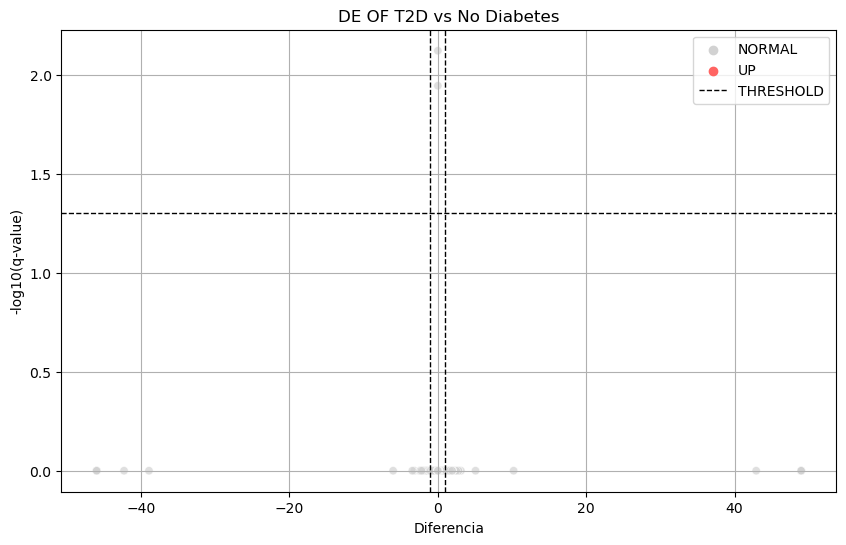

In [50]:
plt.figure(figsize = (10, 6))
colors = {"NORMAL":"#D2D2D2", "UP":"#FF6462", "DOWN":"#62B8FF"}

sns.scatterplot(x = t_results['Diferencia'], y = -np.log10(t_results['q_value']), hue = t_results['sign'], palette = colors, alpha = 0.7)
plt.axhline(-np.log10(0.05), color = 'k', linestyle = '--', linewidth = 1, label = 'THRESHOLD')
plt.axvline(1, color = 'k', linestyle = '--', linewidth = 1)
plt.axvline(-1, color = 'k', linestyle = '--', linewidth = 1)

plt.xlabel('Diferencia')
plt.ylabel('-log10(q-value)')
plt.title('DE OF T2D vs No Diabetes')
plt.legend()
plt.grid(True)
plt.show()

